# 🧠 Sales Prediction using Python 

## ✅ Problem Statement

Predict product sales based on advertising budget on TV, Radio, and Newspaper.

## 📥 Load the Dataset

In [7]:
# Import the dataset
import pandas as pd
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## 🔍 Data Inspection

In [38]:
data.head()     # First few rows

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
data.tail()     # Last few rows

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [34]:
data.shape       # Dimensions

(200, 5)

In [32]:
data.info()      # Structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [30]:
data.describe()     # Summary Stats

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [46]:
cat=data.select_dtypes(include='object').columns
num=data.select_dtypes(exclude='object').columns
cat,num

(Index([], dtype='object'),
 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object'))

In [26]:
data.isnull().sum()  # Missing Values

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## 📊 Exploratory Data Analysis (EDA)

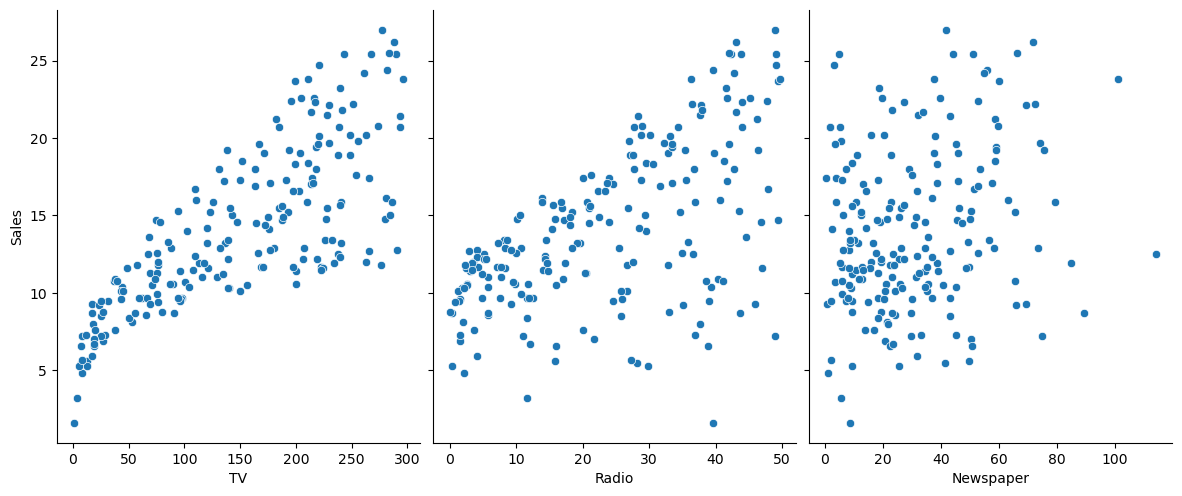

In [42]:
# Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

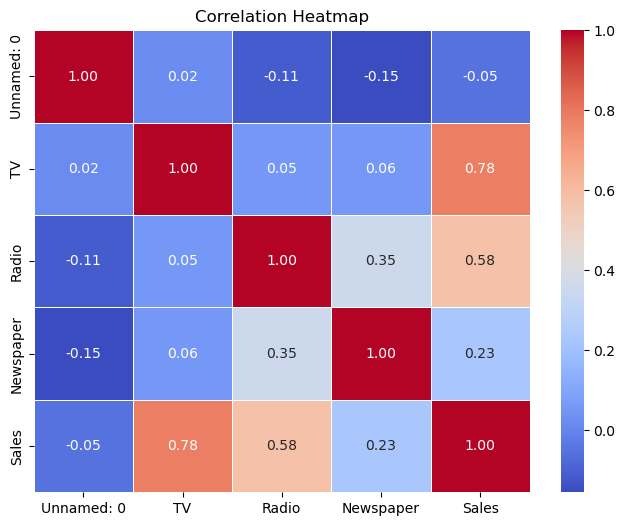

In [44]:
# Compute correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 🏗️ Model Building

In [53]:
# Define input features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Train the Model

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 📈 Evaluate the Model

In [61]:
# Predict on test data
y_pred = model.predict(X_test)

Metrics:

📉 MSE (Mean Squared Error)

🧮 RMSE (Root MSE)

🔍 R² Score

In [63]:
# Evaluate metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE:{mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE:3.20
RMSE: 1.79
R² Score: 0.90


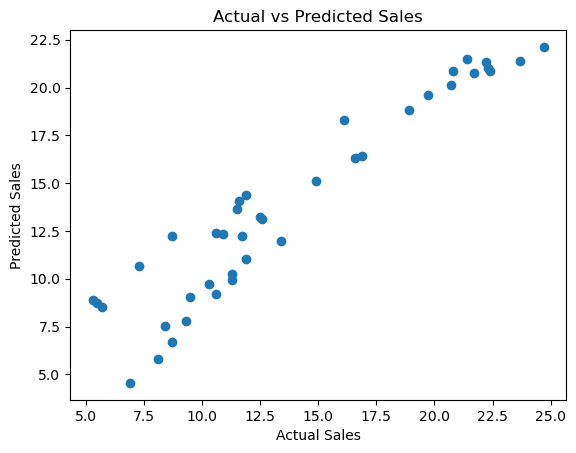

In [68]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

## 💾 Save Model

Save model using joblib

In [72]:
# Save the model 
import joblib
joblib.dump(model, 'Sales_Prediction_model.pkl')

['Sales_Prediction_model.pkl']

## 📥 Load Model

In [76]:
# Load the model
model = joblib.load("Sales_Prediction_model.pkl")